## Feedforward artificial neural network : Image classification
The goal of this excercise is to show how to create a neural network using the tensorflow/keras library. We will be using the MNIST dataset.


References
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/api/utils/python_utils/#to_categorical-function
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/models/model_training_apis/


### Libraries

In [1]:
# Import modules
# Add modules as needed
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
# import matplotlib
# matplotlib.use('agg')

import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Data preparation

#### Import data

In [2]:
def load_data():
    # Import MNIST dataset from openml
    dataset = fetch_openml('mnist_784', version=1, data_home=None)

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()



## Consider the following
- what shape is X?
- what value ranges does X take? 
 - might this present a problem? 
 - what transformations need to be applied?
- what shape is Y?
- what value ranges does Y take? 
 - what transformations should be applied?

In [3]:
from keras.utils import to_categorical

def clean_data(raw_X, raw_Y):
    # TODO: clean and QA raw_X and raw_Y
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
     
    cleaned_X = (raw_X/255).astype('float32')
    cleaned_Y = to_categorical(raw_Y, 10)


    
    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)

#### Data split

- Split your data into a train set (50%), validation set (20%) and a test set (30%). You can use scikit-learn's train_test_split function.

In [4]:
def split_data(cleaned_X, cleaned_Y):

    # TODO: split the data
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    X_train, X_test, Y_train, Y_test = train_test_split(cleaned_X, cleaned_Y, test_size=0.3)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=2/7, train_size=5/7)
    
    return X_val, X_test, X_train, Y_val, Y_test, Y_train

X_val, X_test, X_train, Y_val, Y_test, Y_train = split_data(cleaned_X, cleaned_Y)

In [5]:
print('Shape of X_train:', X_train.shape, '\n', 'Shape of Y_train:', Y_train.shape)               # NÃO DEVO INCLUIR ISSO

'\n'
'\n'

print('Shape of X_val:', X_val.shape, '\n', 'Shape of Y_val:', Y_val.shape)

'\n'
'\n'

print('Shape of X_test:', X_test.shape, '\n', 'Shape of Y_test:', Y_test.shape)

Shape of X_train: (35000, 784) 
 Shape of Y_train: (35000, 10)
Shape of X_val: (14000, 784) 
 Shape of Y_val: (14000, 10)
Shape of X_test: (21000, 784) 
 Shape of Y_test: (21000, 10)


#### [Optional]: plot your data with matplotlib
- Hint: you will need to reshape the row's data into a 28x28 matrix
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

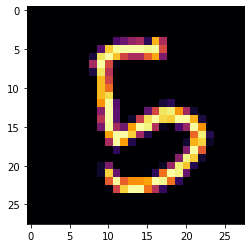

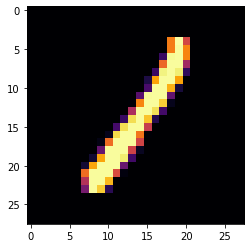

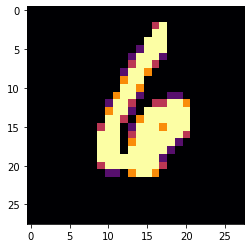

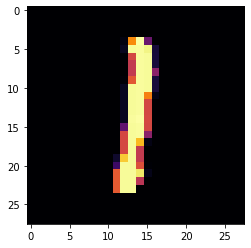

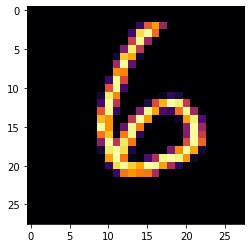

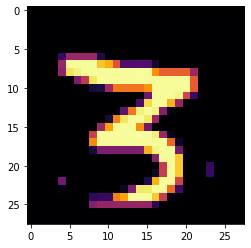

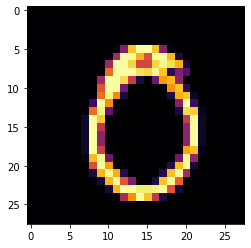

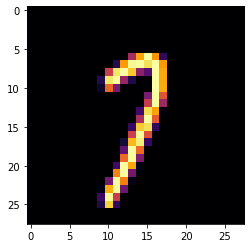

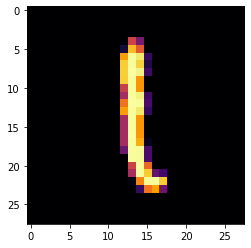

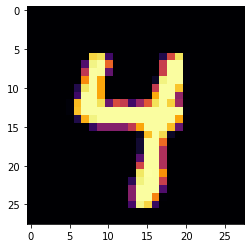

In [6]:
def viz_data(X_train):
    X_train_sample = X_train[:10,]
    # TODO: (optional) plot your data with matplotlib
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    for i in range(10):
      img = X_train_sample[i].reshape((28,28))
      plt.imshow(img, cmap="inferno")
      plt.show()


viz_data(X_train)

### Model

#### Neural network structure
- For this network, we'll use 2 hidden layers
- Layer 1 should have 128 nodes, a dropout rate of 20%, and relu as its activation function
- Layer 2 should have 64 nodes, a dropout rate of 20%, and relu as its activation function
- The last layer should map back to the 10 possible MNIST class. Use softmax as the activation



In [7]:
def build_model():
    # TODO: build the model, 
    # HINT: you should have Total params: 109,386
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))                  # First hidden layer
    model.add(Dropout(0.2))  

    model.add(Dense(64, activation='relu'))                                       # Second hidden layer
    model.add(Dropout(0.2))  

    model.add(Dense(10, activation='softmax')) 
    
    
    return model

model = build_model()


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Model compilation

- what loss function should you use?
- Note your choice of optimizer
- Include accuracy as a metric

# Model training
- Use a batch size of 128, and train for 12 epochs
- Use verbose training, include validation data


In [9]:
def compile_model(model):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


    return model

def train_model(model, X_train, Y_train, X_val, Y_val):
    # TODO: train the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    
    history = model.fit(X_train, Y_train, batch_size=128, epochs=12, validation_data=(X_val, Y_val))
    return model, history


model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)

Epoch 1/12
274/274 [==============================] - 2s 7ms/step - loss: 0.9500 - accuracy: 0.6966 - val_loss: 0.2292 - val_accuracy: 0.9340
Epoch 2/12
274/274 [==============================] - 1s 5ms/step - loss: 0.2693 - accuracy: 0.9209 - val_loss: 0.1659 - val_accuracy: 0.9502
Epoch 3/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1995 - accuracy: 0.9408 - val_loss: 0.1356 - val_accuracy: 0.9601
Epoch 4/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1547 - accuracy: 0.9538 - val_loss: 0.1174 - val_accuracy: 0.9634
Epoch 5/12
274/274 [==============================] - 2s 6ms/step - loss: 0.1318 - accuracy: 0.9595 - val_loss: 0.1092 - val_accuracy: 0.9669
Epoch 6/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1115 - accuracy: 0.9668 - val_loss: 0.0964 - val_accuracy: 0.9706
Epoch 7/12
274/274 [==============================] - 1s 5ms/step - loss: 0.0948 - accuracy: 0.9718 - val_loss: 0.0979 - val_accuracy: 0.9706
Epoch 

**Let's save our model for possible future benefits**

In [10]:
import os
save_dir = "/Ex1 results/"
model_name = 'keras_mnist_FIRST'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

INFO:tensorflow:Assets written to: /Ex1 results/keras_mnist_FIRST/assets
Saved trained model at /Ex1 results/keras_mnist_FIRST 


Está salvo no ficheiro ao lado esquerdo acima do diretório sample_data, NÃO NO DRIVE.

# Model evaluation
- Show the performance on the test set
- What is the difference between "evaluate" and "predict"?
- Identify a few images the model classifies incorrectly. Any observations?

In [11]:
def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    test_loss, test_accuracy = model.evaluate(X_test, Y_test)



    return test_loss, test_accuracy

predictions = model.predict(X_test)
test_loss, test_accuracy = eval_model(model, X_test, Y_test)

657/657 [==============================] - 1s 1ms/step - loss: 0.0913 - accuracy: 0.9735


## Further exploration (Not evaluated)
Looking for something else  to do?
- Transform your code to do hyperparameter search. 
- You can vary the number of nodes in the layers, the drop out rate, the optimizer and the parameters in Adam, the batch size, etc.


### **Learning curves**

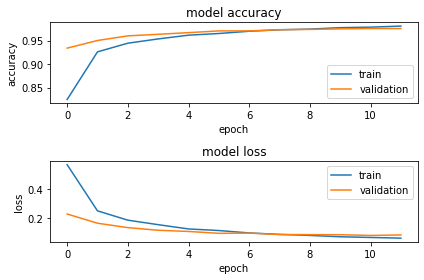

In [12]:
# plotting the accuracy
fig2 = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

# plotting the loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.tight_layout()

fig2.show()

**which we predicted correctly and which not**

In [ ]:
import numpy as np
Incorrect = (np.argmax(predictions, axis=1) !=  np.argmax(Y_test,axis=1)).sum()
Correct = (np.argmax(predictions, axis=1) ==  np.argmax(Y_test,axis=1)).sum()
print('Number of correct predictions:', Correct)
print('Number of incorrect predictions:', Incorrect)

Number of correct predictions: 20437
Number of incorrect predictions: 563


Random Indexes: [ 10 322  60 448]


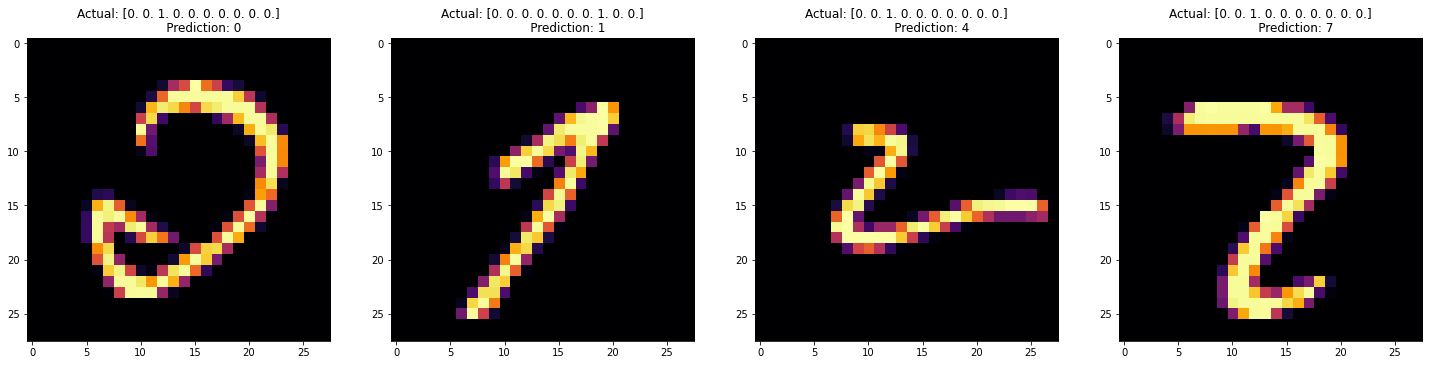

In [ ]:
wrongPredictionIndexes = []
i = 0
for actual, prediction in zip(np.argmax(Y_test, axis=1), np.argmax(predictions, axis=1)):
    if actual != prediction:
        wrongPredictionIndexes.append(i)
    i = i + 1

randomIntList = np.random.randint(len(wrongPredictionIndexes), size = 4)
print('Random Indexes:', randomIntList)
plt.rcParams['figure.figsize'] = (25,50)
plot = 1
plt.figure()
for randomNum in randomIntList:
    plt.subplot(1,len(randomIntList),plot)
    imageIndex = wrongPredictionIndexes[randomNum]
    plt.imshow(X_test[imageIndex].reshape(28,28), cmap = 'inferno')
    plt.title("Actual: " + str(Y_test[imageIndex]) + '\n' "             Prediction: " + str(np.argmax(predictions[imageIndex])))   
        
    plot = plot + 1